<a href="https://colab.research.google.com/github/maxjlake96/Python_Projects/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

sns.set_theme()  # Applies the Seaborn style to all plots


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make plots look nicer
plt.style.use('seaborn-v0_8')


In [ ]:
# Load a public dataset directly from the web
url = "https://raw.githubusercontent.com/datasets/house-prices-uk/master/data/data.csv"
df = pd.read_csv(url)

# Peek at the first few rows
df.head()


,Date,Price (All),Change (All),Price (New),Change (New),Price (Modern),Change (Modern),Price (Older),Change (Older)
0,1953-02-01,1891.0,NaN,2107.0,NaN,2002.0,NaN,1542.0,NaN
1,1953-05-01,1891.0,NaN,2107.0,NaN,2002.0,NaN,1542.0,NaN
2,1953-08-01,1881.0,NaN,2117.0,NaN,2002.0,NaN,1524.0,NaN
3,1953-11-01,1872.0,-1.0,2117.0,0.5,1975.0,-2.2,1542.0,1.2
4,1954-02-01,1863.0,-1.5,2117.0,0.5,1957.0,-2.2,1524.0,-1.2


In [ ]:
# Renaming columns

df.rename(columns={
    'Date': 'date',
    'Price (All)': 'price_all',
    'Change (All)': 'change_all',
    'Price (New)': 'price_new',
    'Change (New)': 'change_new',
    'Price (Modern)': 'price_modern',
    'Change (Modern)': 'change_modern',
    'Price (Older)': 'price_older',
    'Change (Older)': 'change_older'
}, inplace=True)

# Check changes
df.head()

,date,price_all,change_all,price_new,change_new,price_modern,change_modern,price_older,change_older
0,1953-02-01,1891.0,NaN,2107.0,NaN,2002.0,NaN,1542.0,NaN
1,1953-05-01,1891.0,NaN,2107.0,NaN,2002.0,NaN,1542.0,NaN
2,1953-08-01,1881.0,NaN,2117.0,NaN,2002.0,NaN,1524.0,NaN
3,1953-11-01,1872.0,-1.0,2117.0,0.5,1975.0,-2.2,1542.0,1.2
4,1954-02-01,1863.0,-1.5,2117.0,0.5,1957.0,-2.2,1524.0,-1.2


date              0
price_all         0
change_all        3
price_new         0
change_new        3
price_modern     39
change_modern    43
price_older      39
change_older     43
dtype: int64


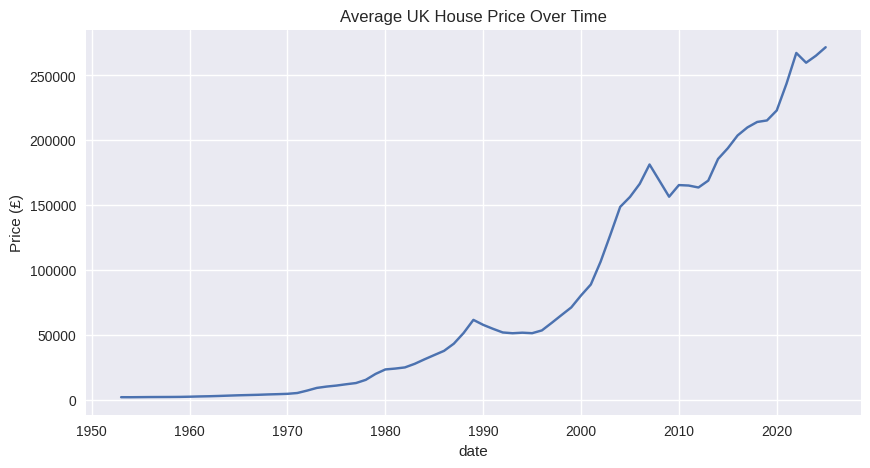

In [ ]:
# Check for missing values
print(df.isna().sum())

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot average price over time
df.groupby(df['date'].dt.year)['price_all'].mean().plot(figsize=(10,5))
plt.title("Average UK House Price Over Time")
plt.ylabel("Price (£)")
plt.show()


In [ ]:
df.info()  # Check data types & non-null counts
df.describe()  # Summary stats
df.isna().sum()  # Missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           290 non-null    datetime64[ns]
 1   price_all      290 non-null    float64       
 2   change_all     287 non-null    float64       
 3   price_new      290 non-null    float64       
 4   change_new     287 non-null    float64       
 5   price_modern   251 non-null    float64       
 6   change_modern  247 non-null    float64       
 7   price_older    251 non-null    float64       
 8   change_older   247 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 20.5 KB


,0
date,0
price_all,0
change_all,3
price_new,0
change_new,3
price_modern,39
change_modern,43
price_older,39
change_older,43


In [ ]:
df['price_all_rolling'] = df['price_all'].rolling(12).mean()


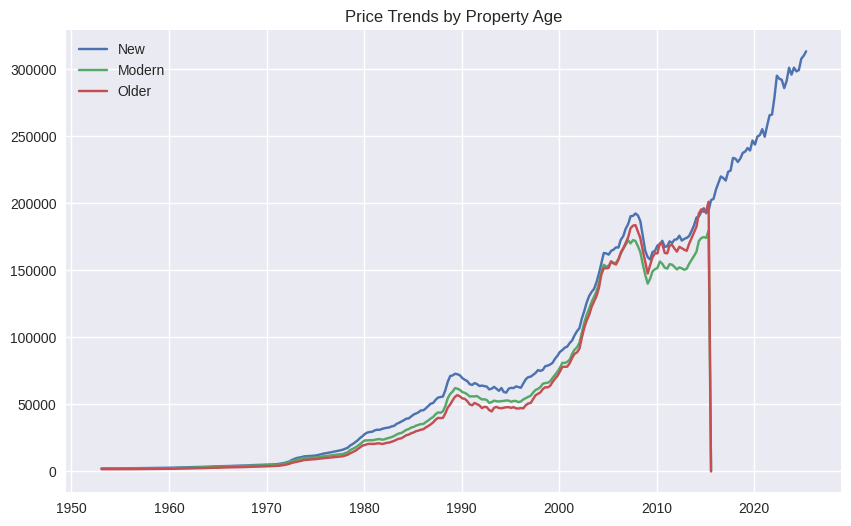

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['price_new'], label='New')
plt.plot(df['date'], df['price_modern'], label='Modern')
plt.plot(df['date'], df['price_older'], label='Older')
plt.legend()
plt.title("Price Trends by Property Age")
plt.show()


In [ ]:
import plotly.express as px
px.line(df, x='date', y=['price_new', 'price_modern', 'price_older'])


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj3gfbll/y18y8of1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj3gfbll/rqriqjo9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86798', 'data', 'file=/tmp/tmpxj3gfbll/y18y8of1.json', 'init=/tmp/tmpxj3gfbll/rqriqjo9.json', 'output', 'file=/tmp/tmpxj3gfbll/prophet_model_ikt6qqh/prophet_model-20250815081001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:10:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

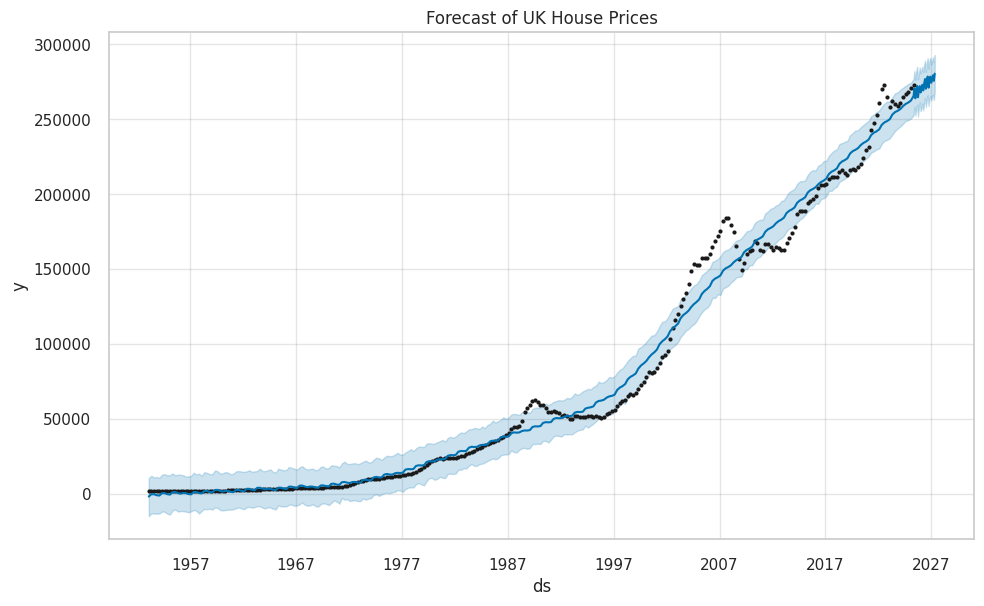

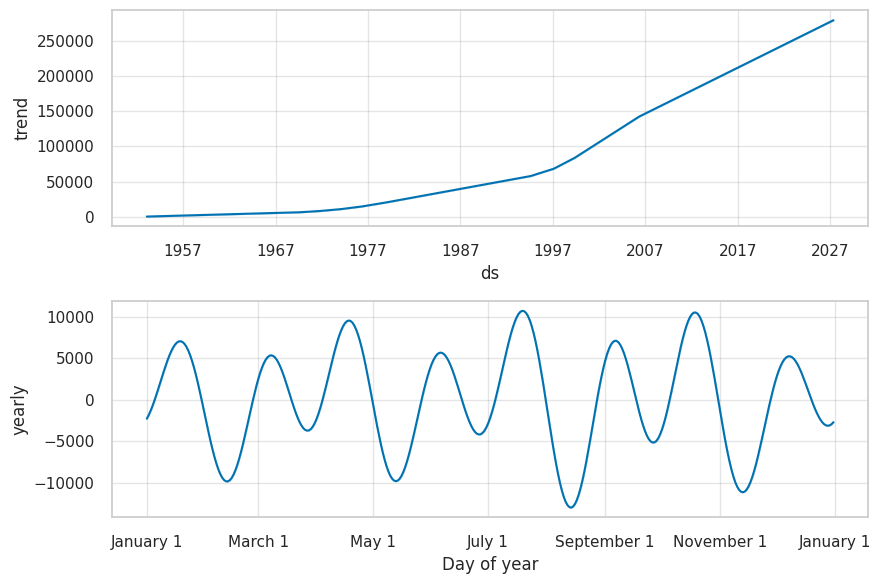

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
df_prophet = df[['date', 'price_all']].rename(columns={'date': 'ds', 'price_all': 'y'})

# Create & fit model
model = Prophet()
model.fit(df_prophet)

# Make future dataframe (next 24 months)
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Forecast of UK House Prices")
plt.show()

# Optional: Plot components
model.plot_components(forecast)
plt.show()

In [ ]:
df.to_csv("uk_housing_cleaned.csv", index=False)
